# Estadística Descriptiva: Entendiendo y Aplicando Medidas con Python

📒  La estadística es la ciencia que se encarga de recolectar, organizar, analizar e interpretar datos para fundamentar la toma de decisiones. Dentro de este campo, la estadística descriptiva es una de las herramientas más fundamentales. Su objetivo es resumir los datos de manera cuantitativa, proporcionando una visión clara y concisa de la información disponible. Por ejemplo, al calcular el promedio, el mínimo y el máximo de las calificaciones de los estudiantes de una clase, estamos utilizando estadísticas descriptivas para comprender el rendimiento general del grupo.

Este notebook tiene como objetivo explorar algunas métricas involucradas en la estadística descriptiva, cómo pueden ser utilizadas y visualizadas. Por lo tanto, este no es un análisis completo, sino uno enfocado en aspectos estadísticos, complementando el texto disponible en Medium.

Enlace de Medium:

Enlace de la fuente de datos: Gym Members Exercise Dataset https://www.kaggle.com/datasets/valakhorasani/gym-members-exercise-dataset

In [69]:
#Importing librarys

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import numpy as np
from matplotlib.ticker import FuncFormatter

plt.style.use('ggplot')
 
from functools import reduce

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [70]:
#Importing dataset
gym = pd.read_csv('gym_members_exercise_tracking.csv')
gym.head(5)

,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
0,56,Male,88.3,1.71,180,157,60,1.69,1313.0,Yoga,12.6,3.5,4,3,30.20
1,46,Female,74.9,1.53,179,151,66,1.30,883.0,HIIT,33.9,2.1,4,2,32.00
2,32,Female,68.1,1.66,167,122,54,1.11,677.0,Cardio,33.4,2.3,4,2,24.71
3,25,Male,53.2,1.70,190,164,56,0.59,532.0,Strength,28.8,2.1,3,1,18.41
4,38,Male,46.1,1.79,188,158,68,0.64,556.0,Strength,29.2,2.8,3,1,14.39


#### Medidas de tendencia central 

Para calcular medidas de tendencia central (Media, Mediana y Moda), utilizamos las siguientes funciones: mean(), median() y mode(), respectivamente.
Para ejemplificar, vamos a verificar estas medidas en relación al peso (Weight(kg)):

In [61]:
media = gym['Weight (kg)'].mean()
mediana = gym['Weight (kg)'].median()
moda = gym['Weight (kg)'].mode()[0]

print(f"Média: {media}")
print(f"Mediana: {mediana}")
print(f"Moda: {moda}")

Média: 73.85467625899278
Mediana: 70.0
Moda: 57.7


En este caso, el peso promedio en el dataset estudiado es de 73.85 kg, la mediana es de 70 kg y la moda es de 57.7 kg.

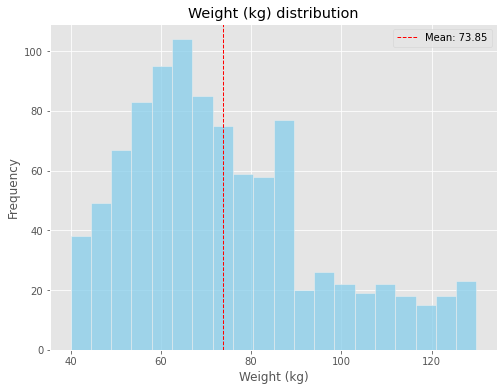

In [62]:
#Creating histogram
plt.figure(figsize=(8,6))
sns.histplot(gym['Weight (kg)'], bins=20, color='skyblue')
plt.title('Weight (kg) distribution')
plt.xlabel('Weight (kg)')
plt.ylabel('Frequency')

#code to show mean
mean_value = gym['Weight (kg)'].mean()
plt.axvline(mean_value, color='red', linestyle='dashed', linewidth=1, label=f'Mean: {mean_value:.2f}')
plt.legend()

plt.show()

Con base en los valores y en el gráfico anterior, podemos sacar algunas conclusiones:

* Simetría de la distribución: La media y la mediana están cerca una de la otra. Aunque la media y la mediana son cercanas, el hecho de que la media sea ligeramente mayor que la mediana podría indicar una ligera asimetría hacia la derecha (cola más larga hacia la derecha). Esto significa que hay algunos valores más altos que están empujando la media hacia arriba, pero no lo suficiente como para causar una gran distorsión.

* Concentración del peso: Dado que la moda es 57.7 kg, esto indica que hay un pico en la frecuencia de personas con 57.7 kg en el conjunto de datos. Aunque la moda sea 57.7 kg, la media y la mediana son mayores (73.85 kg y 70.0 kg, respectivamente). Esto sugiere que, aunque 57.7 kg sea el valor más frecuente, la mayoría de los datos se concentra en pesos más altos.

* Presencia de outliers: Si hubiera una gran diferencia entre la media y la mediana, esto podría indicar la presencia de valores atípicos (outliers) que están afectando la media. Sin embargo, como la media y la mediana son cercanas, esto sugiere que los datos están relativamente uniformemente distribuidos alrededor de la mediana.
Nota: La mediana no cambia, pero la media podría desplazarse debido a un outlier.

#### Medidas de dispersión

En cuanto a las medidas de dispersión, utilizaremos las funciones var() para la varianza y std() para la desviación estándar.

In [71]:
# Calculating variancy and standar deviation
variancia = gym['Weight (kg)'].var()
desvio_padrao = gym['Weight (kg)'].std()

print(f"Varianza: {variancia}")
print(f"Desviación estándar: {desvio_padrao}")

Varianza: 449.7580773899408
Desviación estándar: 21.20750049840718


En este caso, la raíz cuadrada de 449.75 (varianza) es 21.2 (desviación estándar) kg. Por lo tanto, la mayoría de los pesos están dentro de un intervalo de ± 21.2 kg alrededor de la media, es decir, entre 52.65 kg y 95.06 kg. Podemos visualizar estos valores también con un histograma:

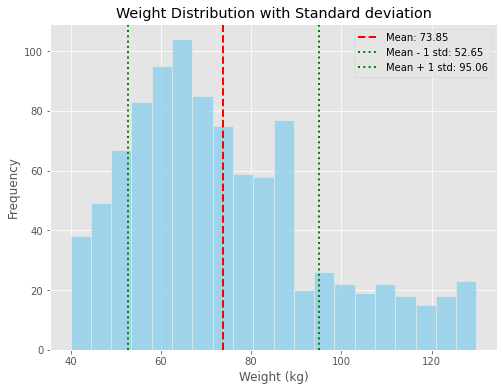

In [64]:
# Creating histogram
plt.figure(figsize=(8, 6))
sns.histplot(gym['Weight (kg)'], bins=20, color='skyblue')
plt.axvline(media, color='red', linestyle='dashed', linewidth=2, label=f'Mean: {media:.2f}')
plt.axvline(media - desvio_padrao, color='green', linestyle='dotted', linewidth=2, label=f'Mean - 1 std: {media - desvio_padrao:.2f}')
plt.axvline(media + desvio_padrao, color='green', linestyle='dotted', linewidth=2, label=f'Mean + 1 std: {media + desvio_padrao:.2f}')
plt.title('Weight Distribution with Standard deviation')
plt.xlabel('Weight (kg)')
plt.ylabel('Frequency')
plt.legend()
plt.show()

#### Cuartiles

In [65]:
# Calculating quartiles
Q1 = gym['Weight (kg)'].quantile(0.25)
Q2 = gym['Weight (kg)'].quantile(0.50)
Q3 = gym['Weight (kg)'].quantile(0.75)

print(f"Q1: {Q1}, Q2: {Q2}, Q3: {Q3}")

Q1: 58.1, Q2: 70.0, Q3: 86.0


Los cuartiles dividen los datos en cuatro partes iguales.

El primer cuartil (Q1) representa el valor por debajo del cual se encuentra el 25% de los datos. En este caso, 25% de los datos están por debajo de 58.1 kg.

El segundo cuartil (Q2), que coincide con la mediana, divide los datos en dos partes iguales. Ya habíamos visto que la mediana (Q2) es de 70 kg.

El tercer cuartil (Q3) indica el valor por debajo del cual se encuentra el 75% de los datos. En este caso, es de 86 kg. 

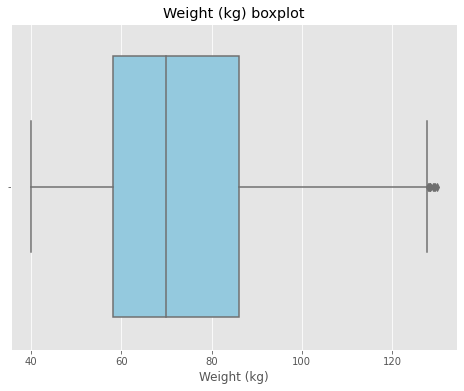

In [66]:
#Creating boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(x=gym['Weight (kg)'], color='skyblue')
plt.title('Weight (kg) boxplot')
plt.xlabel('Weight (kg)')
plt.show()

A través del boxplot, visualizamos que:

La mediana (Q2) está en 70 kg.

El primer cuartil (Q1) es de 58.1 kg, representando el límite inferior de la caja.

El tercer cuartil (Q3) es de 86 kg, representando el límite superior de la caja.

Observe que, por encima del límite superior (la línea fuera de la caja), hay algunos valores, lo que indica la presencia de valores extremos (outliers).

In [68]:
#IQR = Q3 - Q1
#limite superior = Q3 + 1.5 * IQR
#limite inferior = Q1 - 1.5 * IQR


IQR = 86 - 58.1
limite_superior = 86 + 1.5 * IQR 
limite_inferior = 58.1 - 1.5 * IQR

print(f'El límite superior es {limite_superior} y el límite inferior {limite_inferior}')

El límite superior es 127.85 y el límite inferior 16.250000000000007


Por lo tanto, todos los valores que estén por encima de 127 kg o por debajo de 16.25 kg se consideran outliers.

### Conclusión
Este cuaderno fue creado con la intención de complementar el material disponible en Medium, demostrando cómo se calculan algunas medidas dentro de la estadística descriptiva y su importancia. Existen otros detalles que pueden ser explorados y profundizados, pero aquí se ha presentado un contenido relacionado con lo que he estado estudiando actualmente y cómo esto puede aplicarse en un análisis de datos.